In [1]:
import torch
from Args import Args
from Utils.ModelResNet50Places365 import ResNet50_Places365
from Utils.DataSetADE20K import ADE20KDataset
import numpy as np
from lime import lime_image

/home/ltan/anaconda3/envs/conceptlime/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
args = Args()
np.random.seed(args.SEED)

In [3]:
# Load ADE20K dataset
dataset = ADE20KDataset(args.get_path("ADE"))

In [4]:
# Load model to be explained
# device = torch.device("cpu")
model = ResNet50_Places365(args.DEVICE)

In [5]:
# file_id = "00017768"
# sample_id = np.argwhere(dataset.images == f"DataSet/ADEChallengeData2016/images/training/ADE_train_{file_id}.jpg")[0][0]

In [6]:
# explain
sample_id = 0
explained_image = np.array(dataset[sample_id])
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(explained_image, model.predict_prob, top_labels=1, hide_color=0, num_samples=args.SURROGATE_TRAINING_SIZE)

100%|██████████| 1000/1000 [00:34<00:00, 29.38it/s]


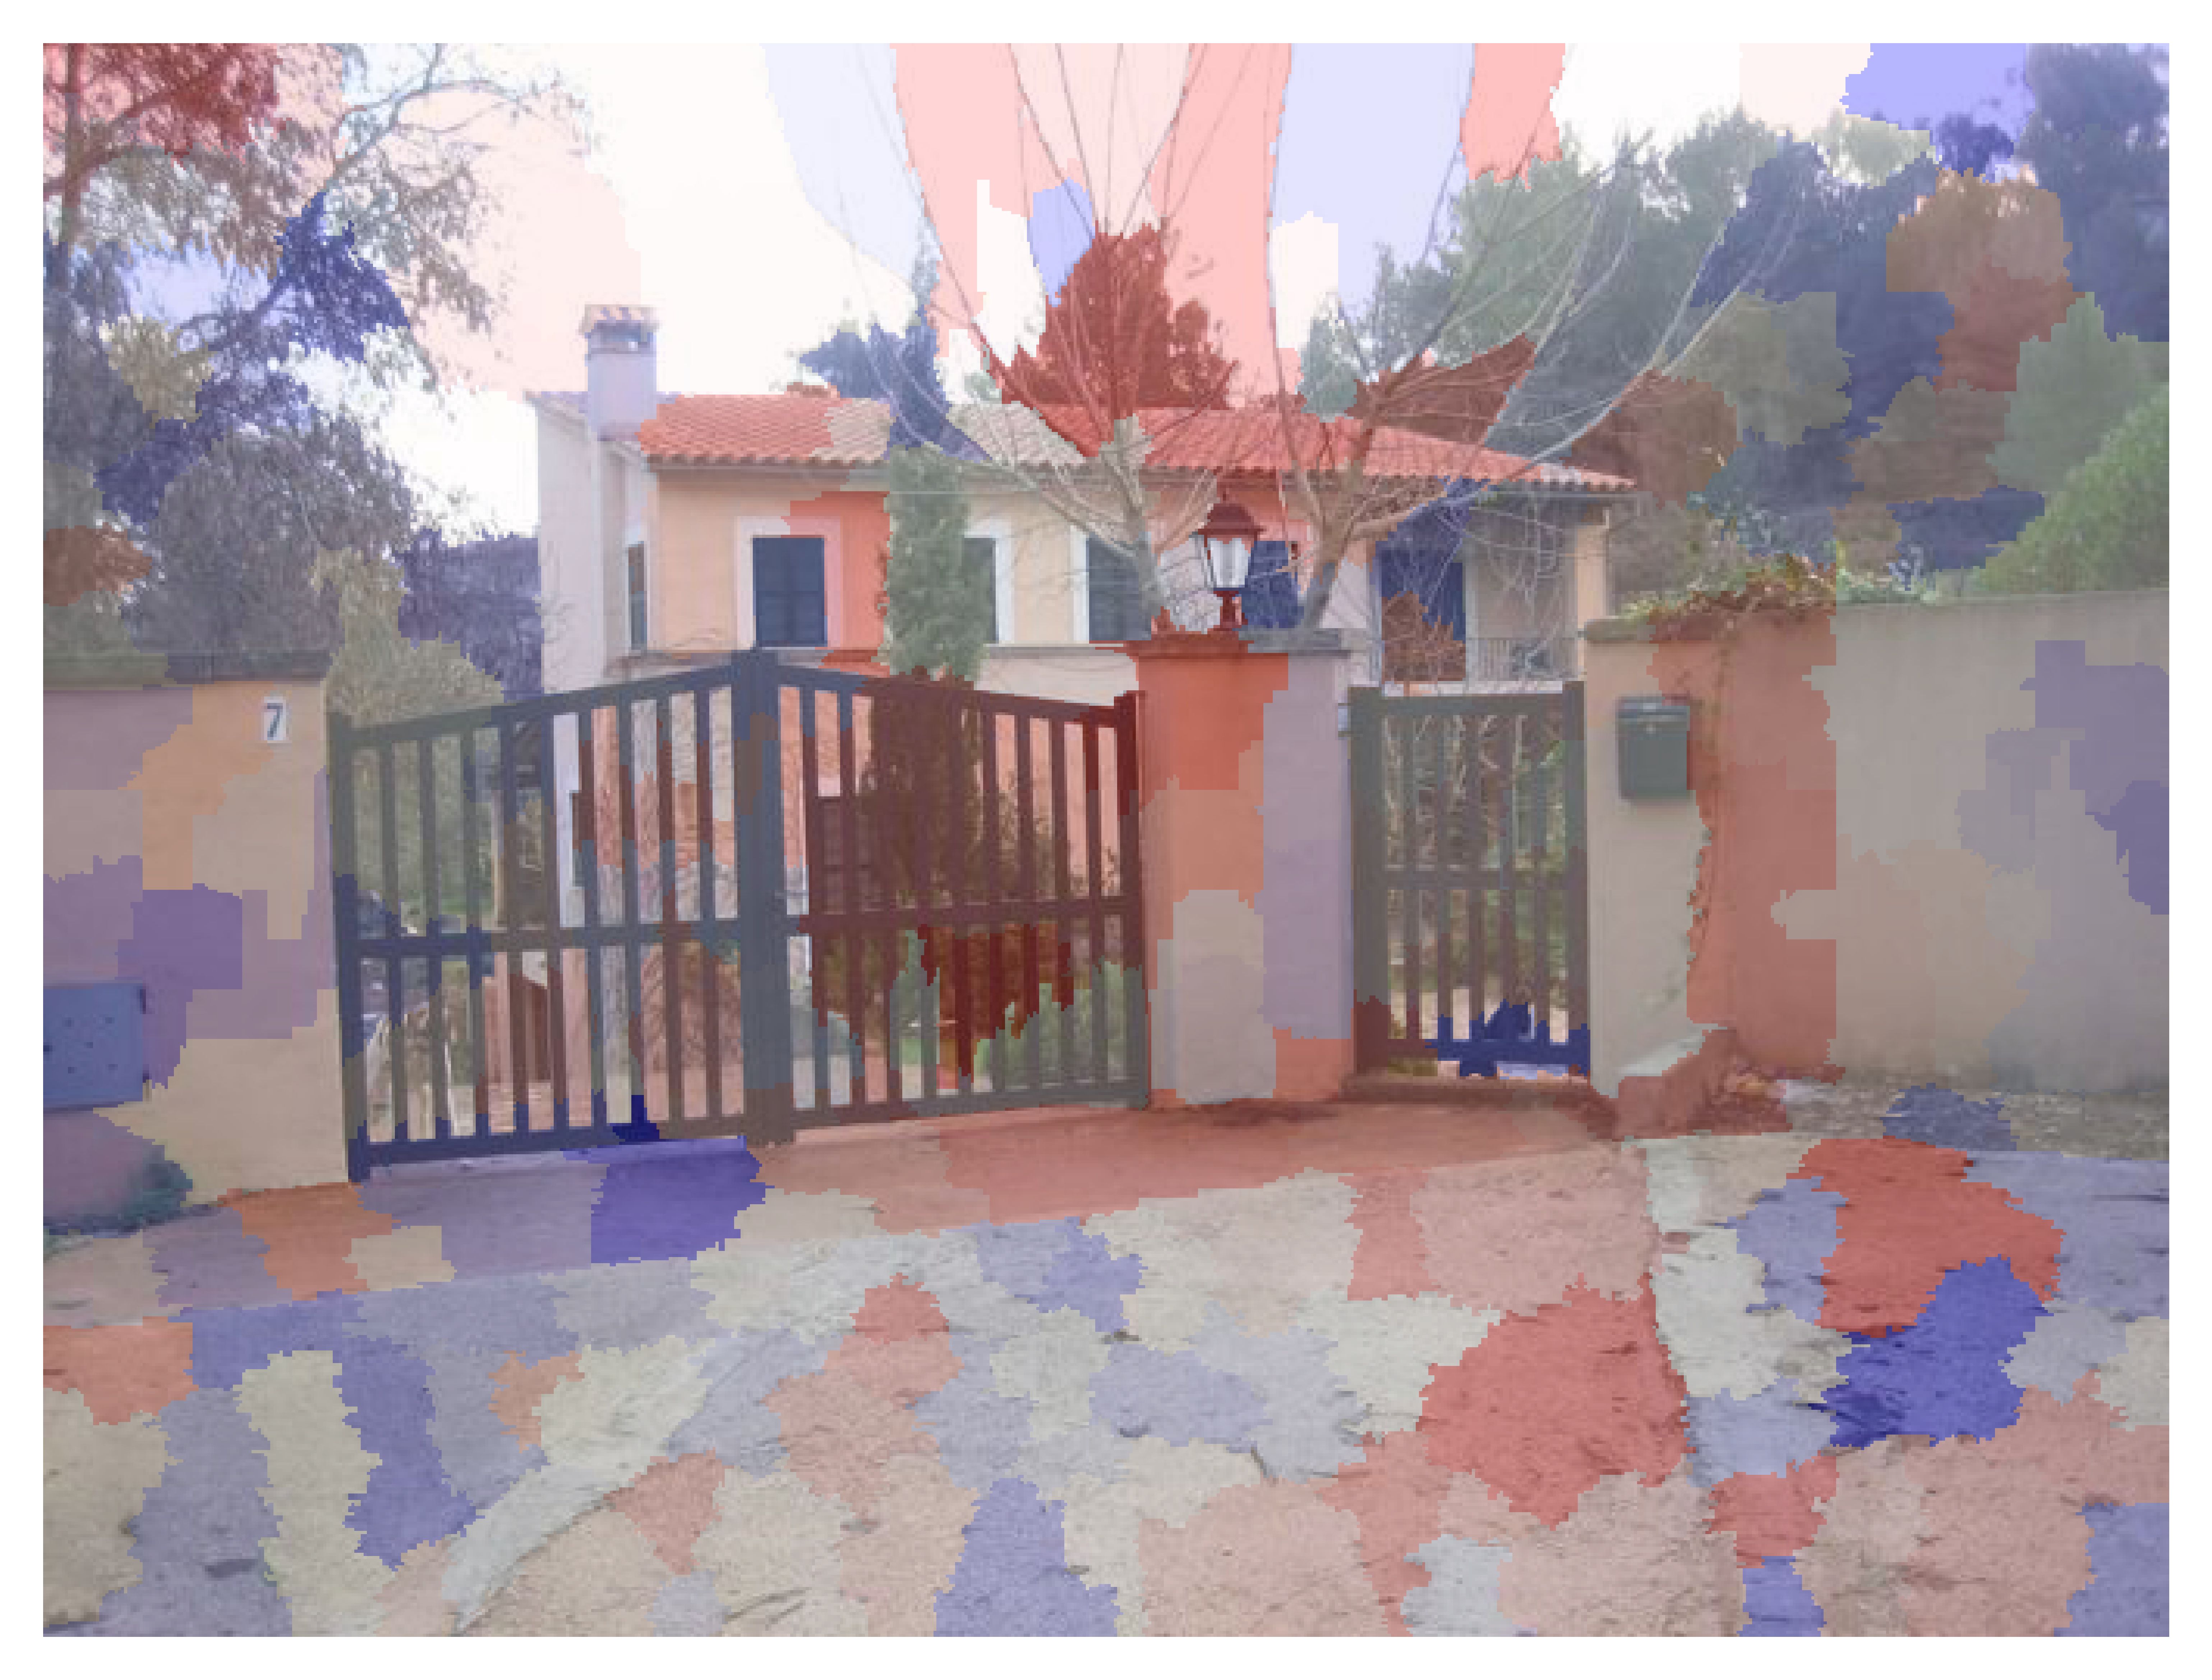

In [9]:
# # visuialization
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import numpy as np
# from Utils.utils import fill_segmentation

# model_pred = model.predict_prob(explained_image[np.newaxis, ...]).reshape(-1)
# top_cls = np.argmax(model_pred)

# exp_list = [tpl[1] for tpl in sorted(explanation.local_exp[top_cls], key=lambda t: t[0])]

# cmap = plt.get_cmap('bwr')

# mask = fill_segmentation(exp_list, explanation.segments)
# norm = mcolors.Normalize(vmin=mask.min(), vmax=mask.max())
# color_mask = cmap(norm(mask))

# plt.figure()
# plt.rcParams["figure.dpi"] = args.DPI
# alpha = args.ALPHA
# image_blended = (1 - alpha) * explained_image + alpha * color_mask[:, :, :3] * 255
# image_blended = np.clip(image_blended / 255, 0, 1)

# plt.imshow(image_blended)
# plt.axis("off")
# plt.axis("tight")
# plt.axis("image")
# plt.show()
# # plt.savefig(f"{args.DIR_RESULT}/Explanation/lime_{file_id}.pdf", bbox_inches = 'tight',pad_inches = 0)